# Projet 5  : Segmentez des clients d'un site e-commerce

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

 

La page d'accueil du site Olist
La page d'accueil du site Olist
Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Vous créez donc un notebook et démarrez votre travail d’analyse exploratoire.



Après quelques premières analyses, vous vous rendez compte qu’Olist ne vous a pas fourni beaucoup de données ; vous enquêtez donc auprès de l’entreprise pour obtenir quelques informations complémentaires, et vérifier que vous avez bien compris la mission. Voici sa réponse.

 

Bonjour, 

Pour des raisons de confidentialité, nous ne pouvons pas vous fournir beaucoup de données à ce stade. Ensuite, en raison de ressources limitées, nous avons dû vous fournir l’ensemble des données, alors que seule une partie va vous intéresser. Nos dashboards internes nous indiquent en effet que seuls 3 % des clients du fichier de données partagé avec vous ont réalisé plusieurs commandes.

Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.

La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions  que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

Pour information, le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

Bien à vous,

Juan, de l’équipe Marketing

Vous réalisez donc trois autres documents afin de préparer une réponse à Olist : 

un notebook avec des essais des différentes approches de modélisation ;
un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation, afin que celui-ci reste pertinent ; 
une présentation pour un collègue afin d’obtenir ses retours sur votre approche.

# Sommaire

## I. Importation des données
### 1. Importation des bibliothèques
### 2. Importation des fichiers

## II. Modélisation avec la méthode RFM
### 1. Sélection des variables
### 2. Création du scoring
### 3. Analyse des scores
### 4. Modélisation
##### 4.1 TSNE avant modélisation
##### 4.2 K-MEANS
##### 4.3 TSNE après modélisation
##### 4.4 Analyse des clusters
##### 4.5 DBSCAN
##### 4.6 Sélection du meilleur modèle
##### 4.7 ACP

## III. Modélisation avec nouvelle variable
### 1. Modélisation
##### 1.1. TSNE avant modélisation
##### 1.2 K-MEANS
##### 1.3 TSNE après modélisation
##### 1.4 Analyse des clusters
##### 1.5 ACP

## IV. Optimisation de notre modèle




# 

## I. Importation des données

### 1.Importation des bibliothèques

In [1]:
# Bibliothèques standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import pi

import warnings
warnings.filterwarnings('ignore')
import missingno as msno


# Bibliothèque pour les dates
import datetime


# Importation pour la standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline


# Importation pour l'ACP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Pour la classification
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

# Optimisation du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV



In [2]:
# Définition titre graphique

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

# 

### 2. Importation du fichier

In [3]:
data = pd.read_csv("data_modelisation.csv")

data

,customer_unique_id,review_score,Total_paiements,recency,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,141.90,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,27.19,115,1
2,0000f46a3911fa3c0805444483337064,3.0,86.22,538,1
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,43.62,322,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,196.89,289,1
...,...,...,...,...,...
93099,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,2067.42,448,1
93100,fffea47cd6d3cc0a88bd621562a9d061,4.0,84.58,263,1
93101,ffff371b4d645b6ecea244b27531430a,5.0,112.46,569,1
93102,ffff5962728ec6157033ef9805bacc48,5.0,133.69,120,1


## II. Modélisation avec la méthode RFM

La segmentation RFM ou méthode RFM est une méthode de segmentation principalement développée à l'origine pour les actions de marketing direct des véadistes et qui s'applique désormais également aux acteurs du e-commerce et du commerce traditionnel.

La segmentation RFM prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.

La segmentation RFM permet de cibler les offres, d'établir des segments basés sur la valeur des clients et de prévenir l'attrition en identifiant des segments à risque.

Les données RFM restent des données très utilisées, mais une "simple" segmentation RFM est de plus en plus rare. Les données RFM sont désormais intégrées dans des procédures de ciblage et de segmentation comportant de plus en plus de variables et de données. Elles dépassent désormais le cadre du marketing direct et peuvent s'appliquer à la publicité display en utilisant une DMP et des procédures de CRM onboarding.

### 1. Sélection des variables

In [4]:
data_rfm = data[['recency','order_id','Total_paiements']]

data_rfm = data_rfm.rename(columns={ 'recency': 'recence',
                                    'order_id' : 'frequence',
                                    'Total_paiements' : 'montant'})
data_rfm.head(5)

,recence,frequence,montant
0,112,1,141.90
1,115,1,27.19
2,538,1,86.22
3,322,1,43.62
4,289,1,196.89


In [5]:
# Création du datframe de segmentation RFM
df_rfm = data_rfm.copy()
df_rfm.head(5)

,recence,frequence,montant
0,112,1,141.90
1,115,1,27.19
2,538,1,86.22
3,322,1,43.62
4,289,1,196.89


### 2. Création du scoring

In [6]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

quantiles.to_dict()

{'recence': {0.25: 115.0, 0.5: 219.0, 0.75: 346.0},
 'frequence': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'montant': {0.25: 63.09, 0.5: 107.87, 0.75: 183.03}}

In [7]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [8]:
#create rfm segmentation table
rfm_segmentation = df_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['recence'].apply(RScore, args=('recence',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequence'].apply(FMScore, args=('frequence',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['montant'].apply(FMScore, args=('montant',quantiles,))

In [9]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,recence,frequence,montant,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,112,1,141.90,4,1,3,413
1,115,1,27.19,4,1,1,411
2,538,1,86.22,1,1,2,112
3,322,1,43.62,2,1,1,211
4,289,1,196.89,2,1,4,214


In [10]:
# Ajout d'une variable RFM de classement du type de client

score_1 = ['431', '432', '433', '434', '441', '442', '443', '444']
score_2 = ['411', '412','413', '414', '421', '422', '423', '424']
score_3 = ['331', '332', '333', '334', '341', '342', '343', '344']
score_4 = ['311', '312', '313', '314', '323', '324', '321', '322',]
score_5 = ['231', '232', '233', '234', '241', '242', '243', '244']
score_6 = ['211', '212', '213', '214', '221', '223', '224']
score_7 = ['121', '122', '123', '124', '131', '132', '133', '134', '141', '142', '143', '144']
score_8 = ['111', '112', '113', '114']
rfm_segmentation['RFMScore'] = ['Meilleurs clients'
                                  if row in score_1
                                  else 'Client fidèle'
                                  if row in score_2
                                  else 'Potentiel développement'
                                  if row in score_3
                                  else 'Nouveau client'
                                  if row in score_4
                                  else 'Client à relancer'
                                  if row in score_5
                                  else 'Client pouvant être perdu'
                                  if row in score_6
                                  else 'Client non fidèle'
                                  if row in score_7
                                  else 'Client perdu'
                                  for row in rfm_segmentation['RFMScore']]

### 3. Analyse des scores

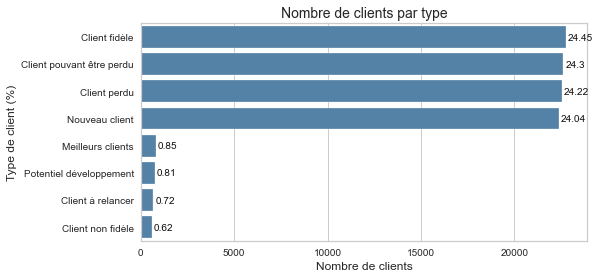

In [11]:
# Répartition des clients dans les différents types

ax1 = plt.gca()

# DataFrame de travail
nb_client = rfm_segmentation['RFMScore'].shape[0]
series_type_client = rfm_segmentation['RFMScore'].value_counts()
df_visu_type_client = pd.DataFrame(
    {'Type_client': series_type_client.index,
     'Nb_clients': series_type_client.values})
df_visu_type_client['%'] = round(
    (df_visu_type_client['Nb_clients'])*100/nb_client, 2)

# Barplot de la distribution
sns.set_style('white')
sns.barplot(y='Type_client', x='Nb_clients',
            data=df_visu_type_client, color='SteelBlue', ax=ax1)
ax1.set_ylabel('Type de client (%)', fontsize=12)
ax1.set_xlabel('Nombre de clients', fontsize=12)
ax1.set_title('Nombre de clients par type', fontsize=14)
for i, p in enumerate(ax1.patches):
    ax1.text(
        p.get_width() +
        p.get_x() + 100,
        p.get_height() +
        p.get_y() - 0.3,
        df_visu_type_client['%'][i],
        fontsize=10,
        color='k')
plt.gcf().set_size_inches(8, 4)
plt.show()

# Pourcentage des différents types de client

Cette méthodologie nous a permis de classer notre clientèle à travers un scoring. Nous constatons que nos meilleurs clients ne représentent que 2.4% de notre clientèle (il ne faut pas oublier les listings créés lors de notre nettoyage).

Nous remarquons que notre clientèle est séparé en 7 parties :

- Clients perdus (25%) : il sera intéressant d'effectuer une étude afin de comprendre les motifs de cette perte de clients
- Clients pouvant être perdu (24.8%) : ce sont ces derniers que l'entreprise doit relancer très rapidement afin de les positionner vers clients fidèles ou en potentiel développement,
- Nouveaux clients (24.6%) : ces derniers ont permis de compenser la perte importante de clients mais il faut développer les démarches à l'intention de ce groupe,
- Clients fidèles (22.7%) : clientèle qui représente le coeur de cible de la société,
- Meilleurs clients (2.4%) : ce sont les clients que l'entreprise doit parfaitement gérer pour continuer à péreniser la relation,
- Potentiel développement : listing de quelques centaines de clients pouvant permettre de les développer et que ces derniers puissent rejoindre le groupe des meilleurs clients,
- Clients à relancer : 

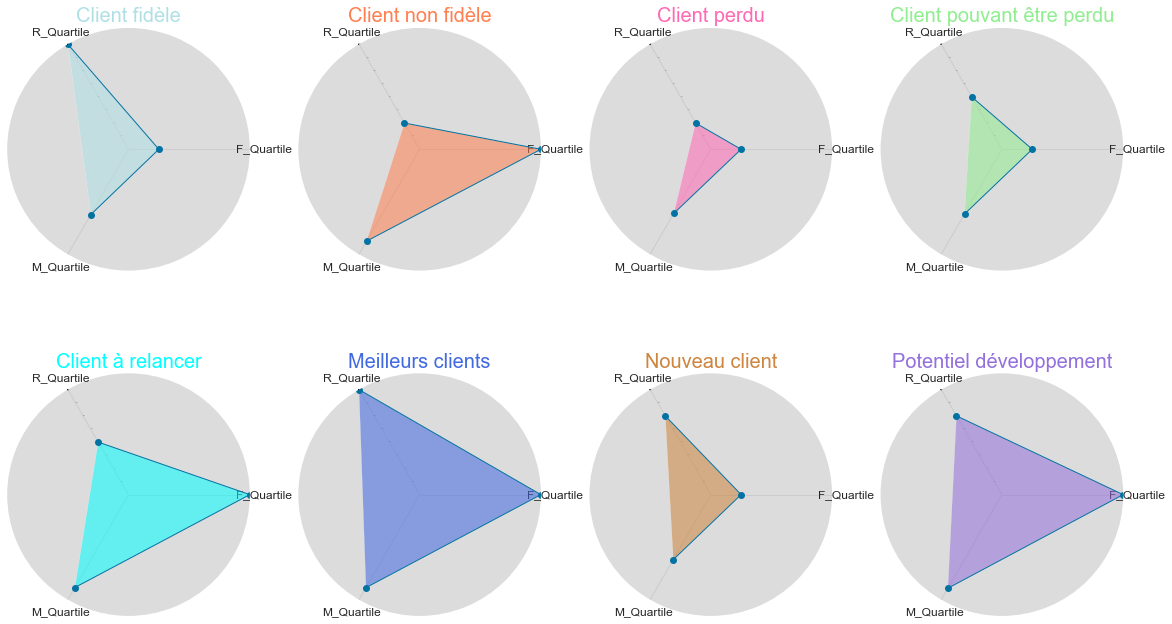

In [12]:
# Radarplot des différents types de client


df_plot = rfm_segmentation.groupby('RFMScore')[['R_Quartile', 'F_Quartile', 'M_Quartile']].mean()
plt.rc('axes', facecolor='Gainsboro')

# number of variable
categories = list(df_plot.columns)

N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot /
# number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]


fig = plt.figure(1, figsize=(20, 18))

colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan',
          'RoyalBlue', 'Peru', 'MediumPurple', 'Tan', 'Silver',
          'RoyalBlue', 'DarkOrange']

for i, region in enumerate(df_plot.index):

    ax = fig.add_subplot(3, 4, i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=10)
    plt.yticks(color="grey", size=2)
    values = df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(0, 4)

plt.show()

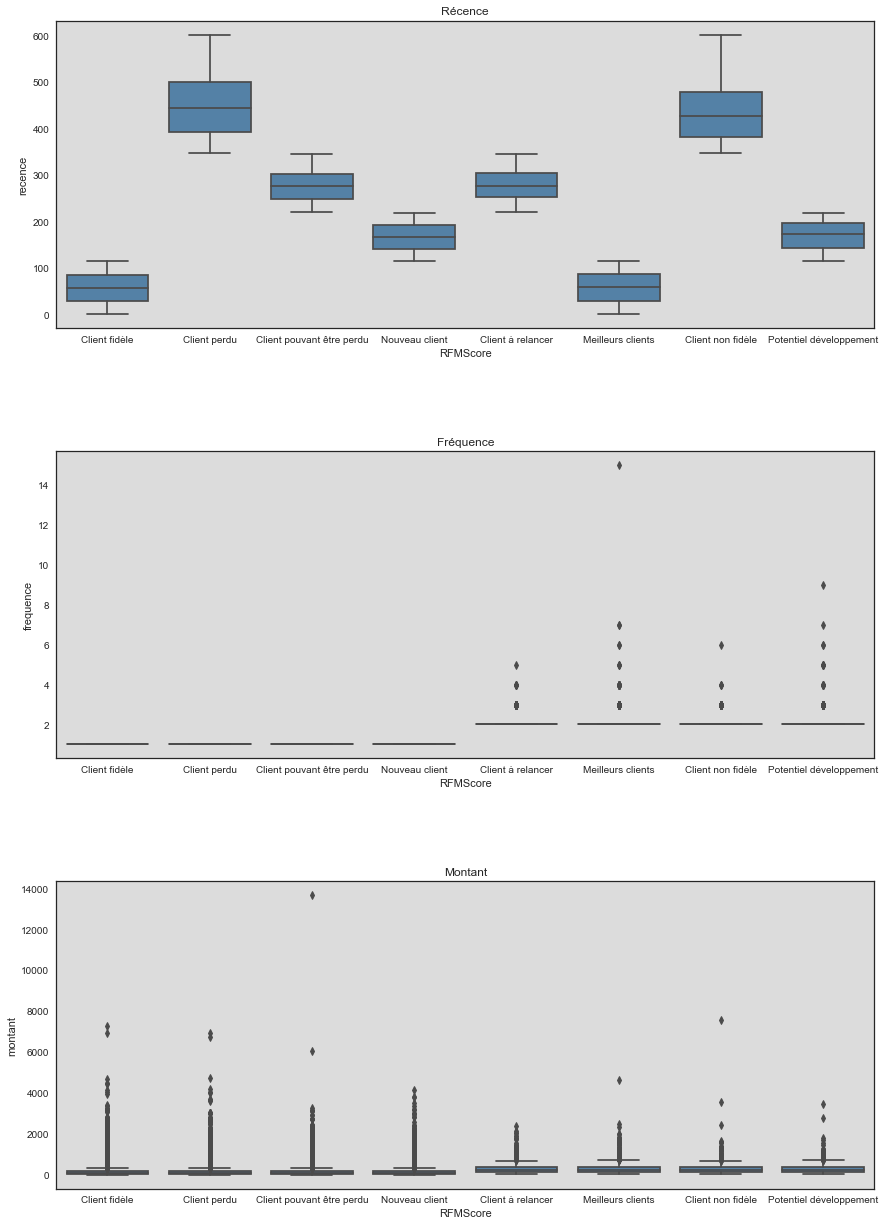

In [13]:
# Boîte à moustache des types de client


fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(left=0.08, right=1.5, bottom=0.05,
                    top=3, hspace=0.4, wspace=0.3)

# Boxplot Récence
sns.boxplot(x='RFMScore', y='recence', data=rfm_segmentation,
            color='SteelBlue', ax=axs[0])
axs[0].set_title('Récence')

# Boxplot Fréquence
sns.boxplot(x='RFMScore', y='frequence', data=rfm_segmentation,
            color='SteelBlue', ax=axs[1])
axs[1].set_title('Fréquence')

# Boxplot Montant
sns.boxplot(x='RFMScore', y='montant', data=rfm_segmentation,
            color='SteelBlue', ax=axs[2])
axs[2].set_title('Montant')

plt.show()

In [14]:
# Pourcentage des différents types de client
df_visu_type_client.style.hide_index()

Type_client,Nb_clients,%
Client fidèle,22762,24.450000
Client pouvant être perdu,22624,24.300000
Client perdu,22550,24.220000
Nouveau client,22379,24.040000
Meilleurs clients,789,0.850000
Potentiel développement,750,0.810000
Client à relancer,673,0.720000
Client non fidèle,577,0.620000


Cette méthodologie nous a permis de classer notre clientèle à travers un scoring. Nous constatons que nos meilleurs clients ne représentent que 2.4% de notre clientèle (il ne faut pas oublier les listings créés lors de notre nettoyage).

Nous remarquons que notre clientèle est séparé en 8 parties :

- Clients fidèles (24,45%) : Clientèle qui représente le coeur de cible de la société, ces derniers sont essentiels au développement de l'entreprise.


- Clients pouvant être perdu (24.3%) : Ce sont ces derniers que l'entreprise doit relancer très rapidement afin de les positionner vers clients fidèles ou en potentiel développement.


- Clients perdus (24,22%) : Ces derniers ne semblent plus avoir de relation avec l'entreprise, leur date d'achat est éloigné et ces derniers ont fait un seul achat avec un montant assez faible.


- Nouveaux clients (24.04%) : Ces derniers ont permis de compenser la perte importante de clients mais il faut développer les démarches à l'intention de ce groupe.


- Meilleurs clients (0.85%) : Ce sont les clients que l'entreprise doit parfaitement gérer pour continuer à péreniser la relation. Ces derniers ont effectué plusieurs achats avec des montants importants.


- Potentiel développement (0.81%) : ce groupe de clients ont effectué plusieurs achats mais également avec un montant plus élevé que la moyenne. Ce groupe de clients peut représenter une clientèle fidèle voir rejoindre les meilleurs clients.


- Clients à relancer (0.72%) : Ces clients méritent d'être relancés afin de continuer à avoir une activité avec ces derniers. Le fait de ne pas les contacter peut provoquer un risque de passage dans le client des clients pouvant être perdus.


- Clients non fidèles (0.62%) : Ce groupe représente des clients ayant effectué un seul achat avec des montants faibles et sur un laps de temps assez important. Ce groupe est très proche du groupe de clients pouvant être perdus.

A travers notre scoring pour la méthode RFM, nous constatons que nous obtenons des groupes hétérogènes avec une premier groupe aux alentours de 22000 à 23000 clients (4 groupes de clients) tandis qu'un second groupe va représenter moins de 5%.

Ce scoring peut nous permettre une analyse très rapide mais ne sera pas conservé comme analyse définitive pour une campagne marketing.

A présent, nous allons procéder à la phase de modélisation de nos données.

### 4. Modélisation

In [15]:
df_means = df_rfm[['recence', 'frequence', 'montant']]
df_means.head(2)

,recence,frequence,montant
0,112,1,141.90
1,115,1,27.19


In [16]:
# Standardisation des données

scaler = StandardScaler()

means_rfm = scaler.fit_transform(df_means)

##### 4.1. TSNE avant modélisation

Afin de représenter nos données, nous allons utiliser la méthode du TSNE (t-distributed stochastic neighbor embedding) est une méthode de réduction de dimensions nous permettant de visualiser nos données.

In [17]:
# TSNE

tsne = TSNE()
T = tsne.fit_transform(means_rfm.copy())

<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

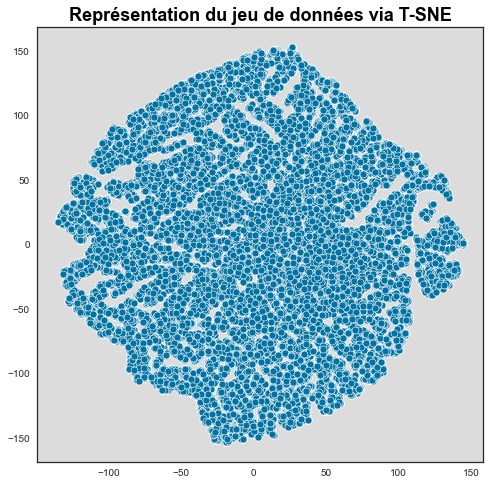

In [18]:
# Visualisation des données

plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE', fontdict = title)
sns.scatterplot(T[:,0], T[:,1])

##### 4.2 K-MEANS

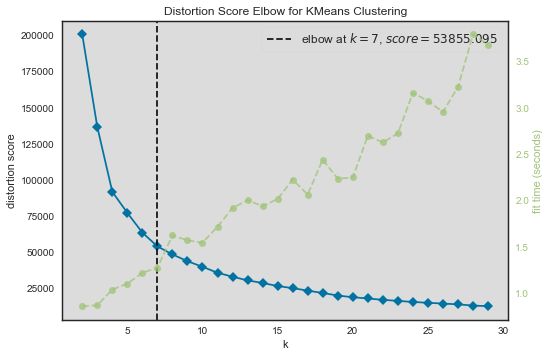

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Création du modèle
model_rfm = KMeans(n_clusters = i, init = 'k-means++')

# Nous allons tester un nombre de clusters entre 2 et 30.
visualizer = KElbowVisualizer(model_rfm, k=(2,30), timings= True)

# Entrainement du modèle et visualisation du nombre de clusters optimal
visualizer.fit(means_rfm)    
visualizer.show()

Dans le cadre de la méthode Elbow, nous constatons que le cluster 7 est celui qui représente au mieux la théorie de cette analyse. Nous allons prendre la décision de conserver ce nombre de clusters.

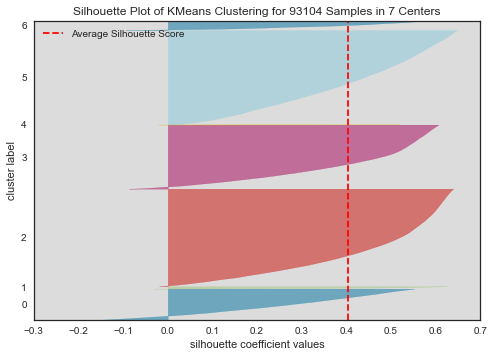

In [20]:
# Analyse de notre modèle avec le coefficient de silhouette

model_rfm = KMeans(n_clusters=7)
visualizer = SilhouetteVisualizer(model_rfm, colors='yellowbrick')
visualizer.fit(df_means)
visualizer.show()
plt.show()

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init = 'k-means++')
y_kmeans = kmeans.fit_predict(means_rfm)

##### 4.3 TSNE après modélisation

In [22]:
# Préparation des données pour la visualisation des données avec les clusters

inertia = {}
dict_kmeans1 = {}

nb_boucles=2
max_clusters = 8

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i).fit(df_means)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans1[k,i] = kmeans

Boucle  1
Boucle  2


<AxesSubplot:title={'center':'Représentation T-SNE de la séparation du jeu de données via KMeans (7 clusters)'}>

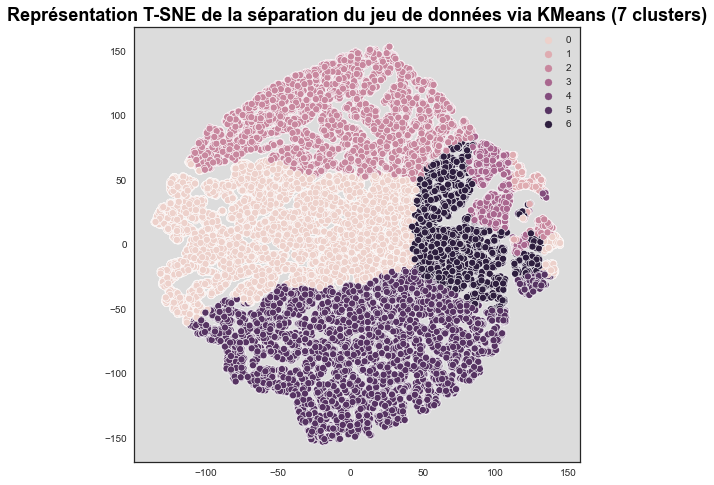

In [23]:
# Visualisation des données

plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation du jeu de données via KMeans (7 clusters)',
         fontdict = title)
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=dict_kmeans1[(1,7)].labels_,
                legend='full')

##### 4.4 Analyse des clusters

In [24]:
clusters = model_rfm.labels_
df_means['label_centroide'] = y_kmeans

0    32862
4    32222
6    20434
1     4223
2     2533
3      603
5      227
Name: label_centroide, dtype: int64


Text(0.5, 1.0, 'Visualisation des clients par clusters')

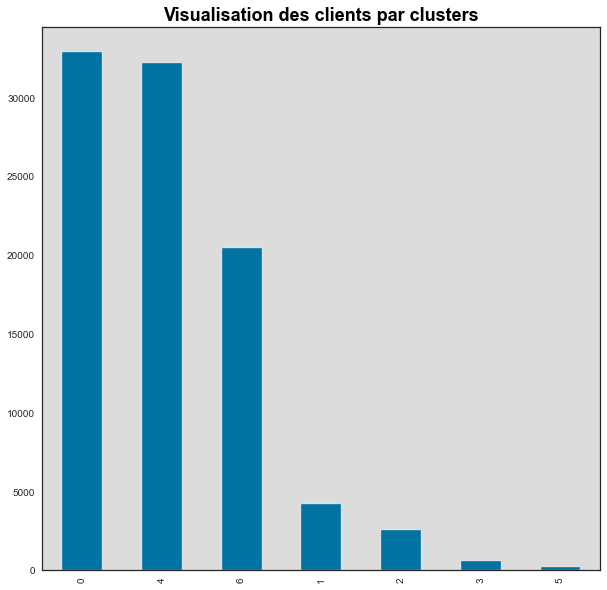

In [25]:
# Visualisation des clients par clusters

print(df_means['label_centroide'].value_counts())

plt.figure(figsize = (10,10))
df_means['label_centroide'].value_counts().plot(kind = 'bar')
plt.title('Visualisation des clients par clusters',
         fontdict = title)

In [26]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    res = [(d-y1) / (y2-y1) * (x2-x1) + x1
           for d, (y1, y2) in zip(data, ranges)]
    return res


class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges,
                 n_ordinate_levels=6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:]
        size_x, size_y = sizes[:]

        axes = [fig.add_axes([ix, iy, size_x, size_y],
                             polar=True,
                             frameon=False,
                             label="axes{}".format(i))
                for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels=variables, size=13)

        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)

        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid(False)

        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num=n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:]]
            ax.set_rgrids(grid, labels=grid_label, angle=angles[i], size=12)
            ax.set_ylim(*ranges[i])

        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)

    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform=self.ax.transAxes, *args, **kw)

def radar_plot(df, group="label_centroide", xsize=0.1, ysize=0.05, figsize=(12, 4)):
    """
    Input : Dataframe, colonne des clusters
    Output : Affichage des clusters en radar chart
    """

    # Moyenne des variables par cluster
    df_agg = df.groupby(group)[df.columns].mean()

    # Taille des clusters en %
    clusters_size = round(df[group].value_counts()
                          / df[group].count() * 100, 2)

    # Liste des variables descriptives des clusters
    var_descriptives = [col for col in df.columns if col not in group]

    # Min,max des variables descriptives
    var_descript_ranges = [list(df_agg.describe().loc[['min', 'max'], var])
                           for var in var_descriptives]

    # Nombre de clusters
    n_clusters = df[group].nunique()

    # Liste des index des variables descriptives
    vars_index = list(range(len(var_descriptives)))

    # Dimension de la grille
    n_cols = 3
    m_rows = n_clusters // n_cols

    size_x, size_y = (1 / n_cols), (1 / m_rows)

    fig = plt.figure(figsize=figsize)

    df_agg_index = df_agg.index

    for i_cluster in range(n_clusters):

        ix = i_cluster % n_cols
        iy = m_rows - i_cluster // n_cols
        pos_x = ix * (size_x + xsize)
        pos_y = iy * (size_y + ysize)
        location = [pos_x, pos_y]
        sizes = [size_x, size_y]
        data_plot = np.array(df_agg.loc[df_agg_index[i_cluster],
                                        var_descriptives])
        radar = RadarChart(fig, location, sizes, var_descriptives,
                           var_descript_ranges)
        radar.plot(data_plot, color='b', linewidth=2.0)
        radar.fill(data_plot, alpha=0.2, color='b')

        # Titre du radarchart
        cluster_num = df_agg_index[i_cluster]
        cluster_size = clusters_size[i_cluster]
        radar.title(title=f'cluster n°{cluster_num}\nsize={cluster_size}%',
                    color='r',
                    size=14)
        i_cluster += 1
        

In [27]:
# Données pour le radar chart
rfm_quantiles = df_means.loc[:, ['recence', 'frequence', 'montant', 'label_centroide']]


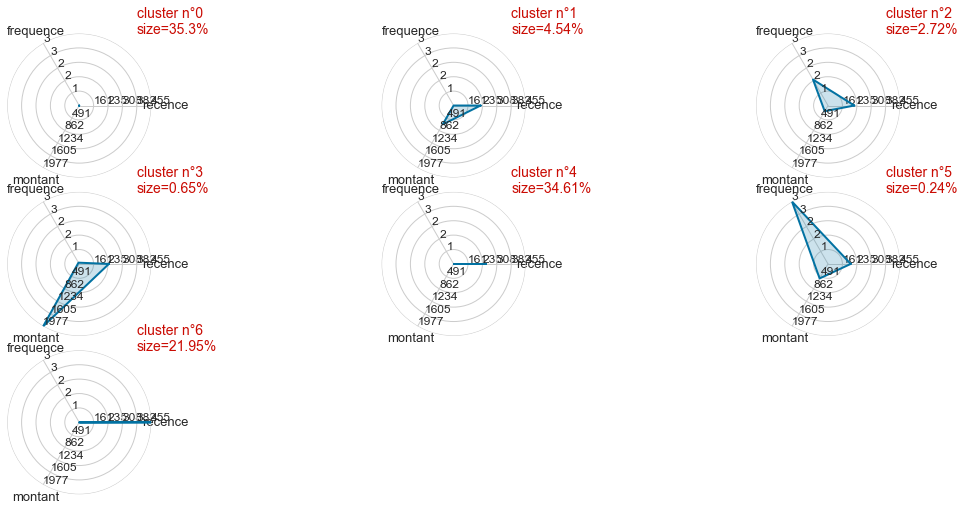

In [28]:
# Affichage des radar chart
radar_plot(df = rfm_quantiles)

###### 

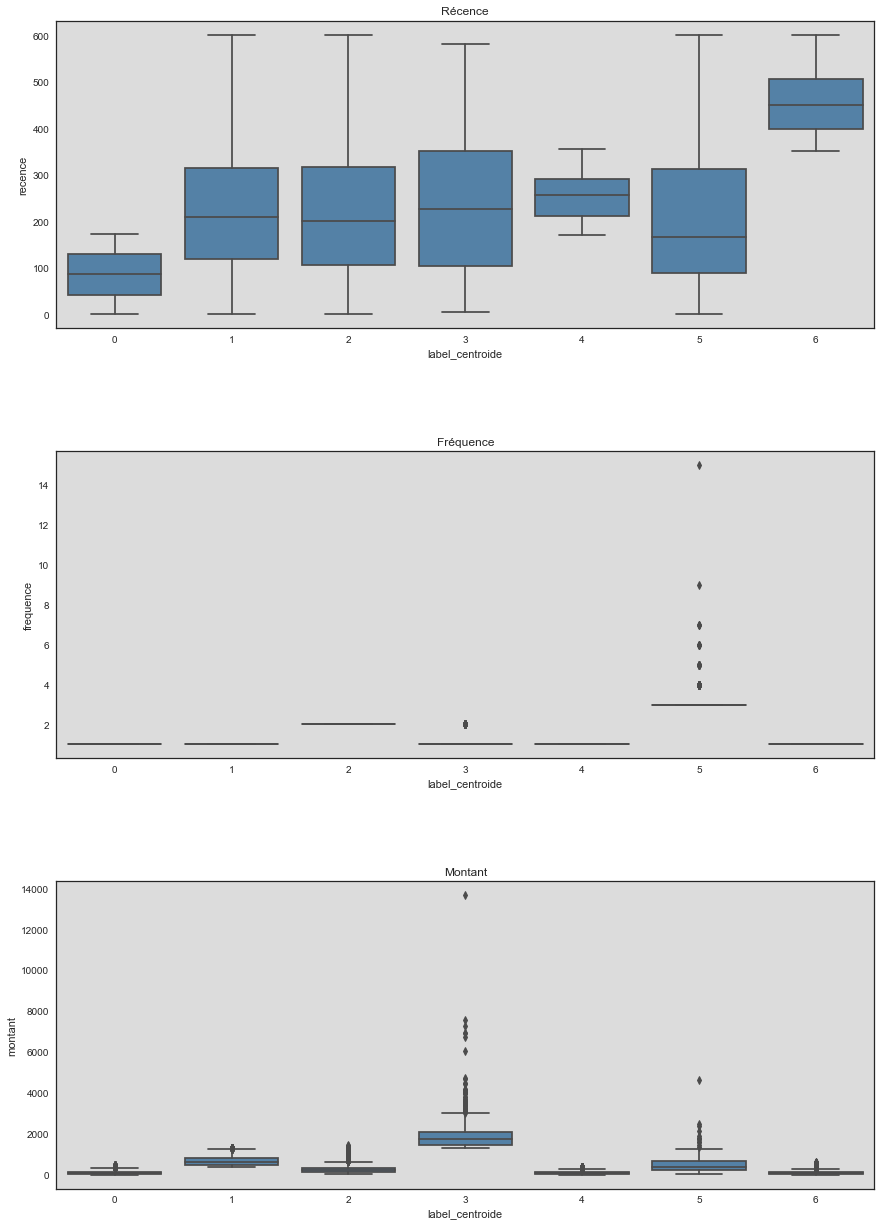

In [29]:
# Boîte à moustache des types de client


fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(left=0.08, right=1.5, bottom=0.05,
                    top=3, hspace=0.4, wspace=0.3)

# Boxplot Récence
sns.boxplot(x='label_centroide', y='recence', data=df_means,
            color='SteelBlue', ax=axs[0])
axs[0].set_title('Récence')

# Boxplot Fréquence
sns.boxplot(x='label_centroide', y='frequence', data=df_means,
            color='SteelBlue', ax=axs[1])
axs[1].set_title('Fréquence')

# Boxplot Montant
sns.boxplot(x='label_centroide', y='montant', data=df_means,
            color='SteelBlue', ax=axs[2])
axs[2].set_title('Montant')

plt.show()

##### 4.5 DBSCAN

In [30]:
# Préparation des données pour obtenir l'optimal de epsilon

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_means)
distances, indices = nbrs.kneighbors(df_means)

Text(0.5, 1.0, 'Représentation de epsilon')

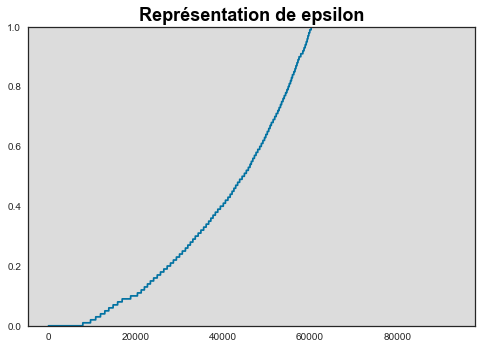

In [31]:
# Visualisation des données

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(0,1)
plt.title('Représentation de epsilon', fontdict = title)

Le epsilon optimal est 0.1, nous allons l'utiliser pour la suite de notre modélisation.

In [32]:
# Entrainement du modèle avec notre epsilon

dbs = DBSCAN(eps = 0.1).fit(df_means)
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 128
Estimated number of noise points: 92282


<AxesSubplot:title={'center':'Représentation de la séparation des données du DBSCAN via T-SNE'}>

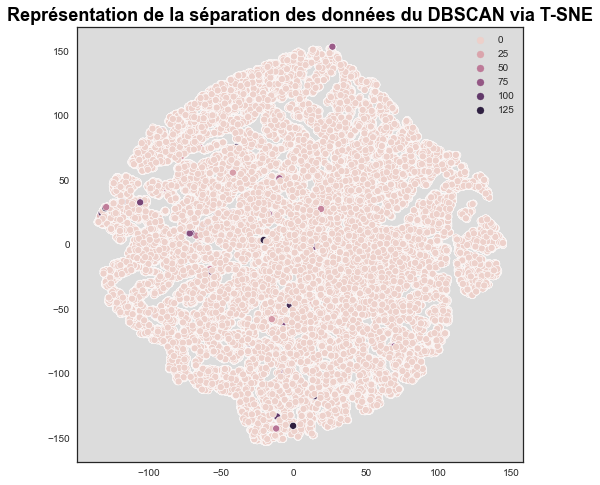

In [33]:
# Visualisation des données avec le TSNE

plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE',
         fontdict = title)
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)

Nous obtenons 128 clusters, nous allons prendre la décision de conserver le modèle du K-MEANS.

##### 4.6 Clustering hiérarchique

Cette algorithme demande une grande consommation de la mémoire, nous allons procéder à une sélection d'un échantillon de 10000 clients.

In [34]:
# Entrainement du modèle avec un nombre de clusters identique à notre KMeans

nb_clusters = 7
nb_clusters_agg = nb_clusters

In [35]:
# Création de notre échantillon

means_rfm = df_means[['recence', 'frequence', 'montant']]
data_echantillon = means_rfm.sample(n = 10000, random_state = 100)
X = data_echantillon.copy()

ss = StandardScaler()
X = ss.fit_transform(X)

In [36]:
model_hierarchy = AgglomerativeClustering(n_clusters = nb_clusters_agg
                             ).fit(X.copy())


In [37]:
# Entrainement du modèle
clusters_labels_hierarchy = model_hierarchy.fit_predict(X)

# uniques clusters
hierarchy_class = np.unique(clusters_labels_hierarchy)

In [38]:
algorithm_name = 'hierarchical clustering'
standardized_features = X
clusters_labels_hierarchy = clusters_labels_hierarchy

In [39]:
# Visualisation du nombre de clients par clusters

import numpy as np
for i in np.unique(clusters_labels_hierarchy):
    c = sum(clusters_labels_hierarchy == i)
    print(c)

904
4271
27
2681
102
1776
239


Nous avons pris la décision d'entraîner notre modèle à travers le nombre de clusters identique au KMeans. Nous remarquons que les clusters sont très fortement déséquilibré sur notre échantillon de test.

Cet algorithme présente une impossibilité d'être testé sur l'ensemble du jeu de données mais également une représentation peu cohérente.
Nous n'allons pas le conserver pour notre analyse.

##### 4.7 Modélisation avec ACP

In [40]:
# Standardisation des données

scaler = StandardScaler()

X = df_means[['recence', 'frequence', 'montant']]

X_scaled = scaler.fit_transform(X)

pca = PCA(X)

In [41]:
# On démarre par la création de notre variable names et features

names = data.index
features = data.columns

In [42]:
# Vérification de nos données
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0


In [43]:
# Création nombre de composants (choix aléatoire)

n_components = 3

# On lance notre ACP

pca = PCA(n_components=n_components)

# On l'entraîne sur nos données
df_pca = pca.fit_transform(X_scaled)

df_pca.shape

(93104, 3)

In [44]:
# Création de nos données dans un Dataframe
data_pca = pd.DataFrame(X, columns=['CP_1', 'CP_2', 'CP_3'])

In [45]:
# Utilisation de la variance captée
pca.explained_variance_ratio_

# On enregistre cette donnée dans une variable
varcum = (pca.explained_variance_ratio_*100).round(2)
pca_variance = pca_variance = pca.explained_variance_ratio_

# Somme cumulée
somcum = varcum.cumsum().round()


print('La variable cumulée est de :',varcum)
print('La somme cumulée est de :',somcum)

La variable cumulée est de : [37.97 33.29 28.74]
La somme cumulée est de : [ 38.  71. 100.]


In [46]:
# Création de nos données dans un Dataframe
data_pc = pd.DataFrame(df_pca, columns=['CP_1', 'CP_2', 'CP_3'])
data_graph = data_pc.join(X, how = 'left')

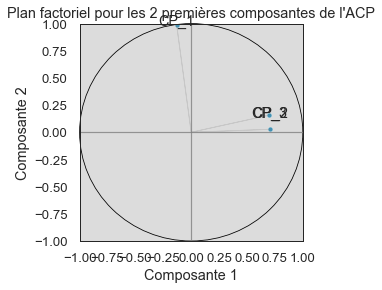

In [47]:
data_pca = data_pca.select_dtypes(['float64','int32'])
colonnes_pca = data_pca.columns


from matplotlib.patches import Circle

sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(4,4))
plt.title("Plan factoriel pour les 2 premières composantes de l'ACP")
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 

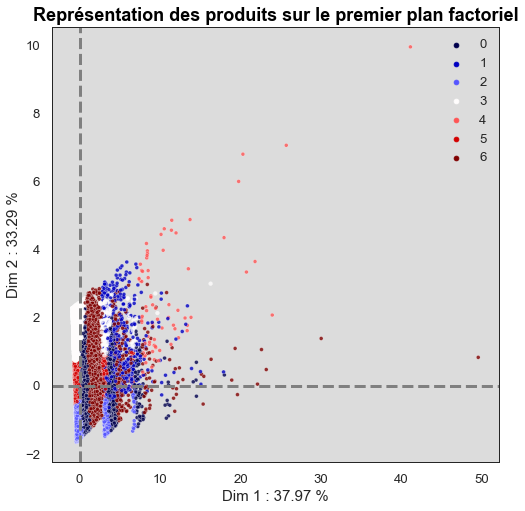

In [48]:
# visualisation des observations sur l'axe principal de l'ACP, avec couleurs selon les scores
fig = plt.figure(figsize=(8,8))
sns.set_context("paper", font_scale=1.5)

g= sns.scatterplot(data=data_pc, x='CP_1', y='CP_2', hue= clusters, alpha=0.8,
                  s=15, legend='full',
                  palette = 'seismic')

plt.title("Représentation des produits sur le premier plan factoriel", fontdict = title)
g.set_xlabel("Dim 1 : " + str(round(pca_variance[0]*100,2)) + " %", fontsize=15)
g.set_ylabel("Dim 2 : " + str(round(pca_variance[1]*100,2)) + " %", fontsize=15)

plt.axvline(color='gray', linestyle='--', linewidth=3)
plt.axhline(color='gray', linestyle='--', linewidth=3)


## III. Modélisation avec nouvelle variable

Nous avons constaté que notre meilleur modèle est le KMeans avec le modèle RFM. Les modèles du DBSCAN et du Clustering hiérarchique ne présentent pas des résultats satisfaisants.

Nous allons, à présent, procéder à une nouvelle modélisation du KMeans avec l'ajout d'une nouvelle variable. Nous allons prendre la décision d'entraîner uniquement ce modèle puis de chercher à l'optimiser dans le but d'obtenir le meilleur modèle.

### 1. Modélisation

In [49]:
data

,customer_unique_id,review_score,Total_paiements,recency,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,141.90,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,27.19,115,1
2,0000f46a3911fa3c0805444483337064,3.0,86.22,538,1
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,43.62,322,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,196.89,289,1
...,...,...,...,...,...
93099,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,2067.42,448,1
93100,fffea47cd6d3cc0a88bd621562a9d061,4.0,84.58,263,1
93101,ffff371b4d645b6ecea244b27531430a,5.0,112.46,569,1
93102,ffff5962728ec6157033ef9805bacc48,5.0,133.69,120,1


In [50]:
# Sélection de nos variables


df_means2 = data[['recency','order_id','Total_paiements','review_score']]

In [51]:
# Standardisation des données

scaler = StandardScaler()

df_means2 = scaler.fit_transform(df_means2)

##### 1.1. TSNE avant modélisation

In [52]:
# TSNE

tsne = TSNE()
T = tsne.fit_transform(df_means2.copy())

<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

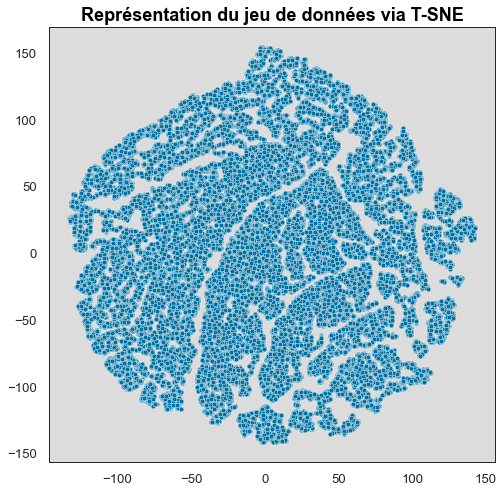

In [53]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE', fontdict = title)
sns.scatterplot(T[:,0], T[:,1])

##### 1.2 K-MEANS

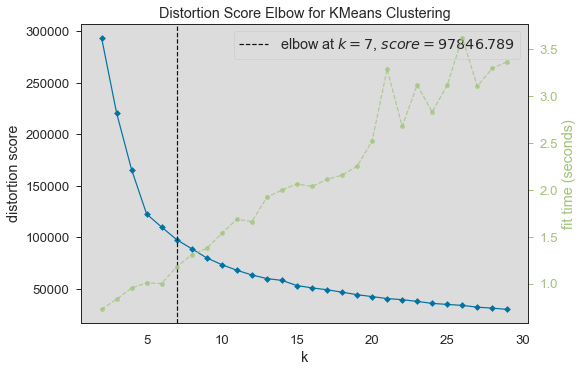

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Création du modèle
model_rfm2 = KMeans(n_clusters = i, init = 'k-means++')


# k est la plage du nombre de clusters.
visualizer = KElbowVisualizer(model_rfm2, k=(2,30), timings= True)


# Entrainement du modèle
visualizer.fit(df_means2)    
visualizer.show()

Contrairement à la modélisation RFM, notre méthode Elbow nous permet de constater que l'on peut émettre un doute entre 5, 6 et 7 clusters. Nous allons vérifier le meilleur résultat à travers l'analyse du coefficient de silhouette.

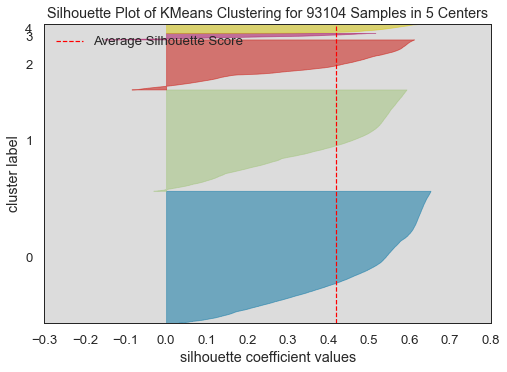

In [55]:
# Visualisation du coefficient de silhouette avec 5 clusters

model_rfm2 = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model_rfm2, colors='yellowbrick')
visualizer.fit(df_means2)
visualizer.show()
plt.show()

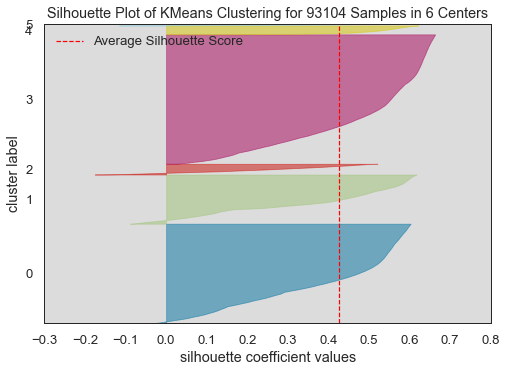

In [56]:
# Visualisation du coefficient de silhouette avec 6 clusters

model_rfm2 = KMeans(n_clusters=6)
visualizer = SilhouetteVisualizer(model_rfm2, colors='yellowbrick')
visualizer.fit(df_means2)
visualizer.show()
plt.show()

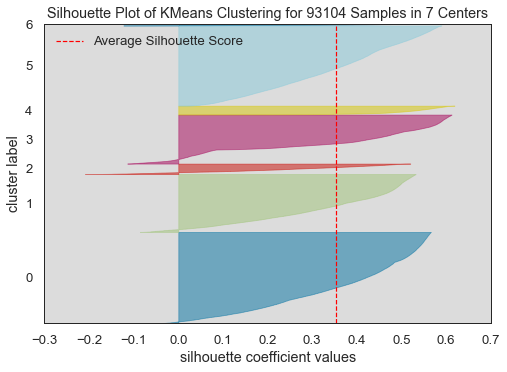

In [57]:
# Visualisation du coefficient de silhouette avec 7 clusters

model_rfm2 = KMeans(n_clusters=7)
visualizer = SilhouetteVisualizer(model_rfm2, colors='yellowbrick')
visualizer.fit(df_means2)
visualizer.show()
plt.show()

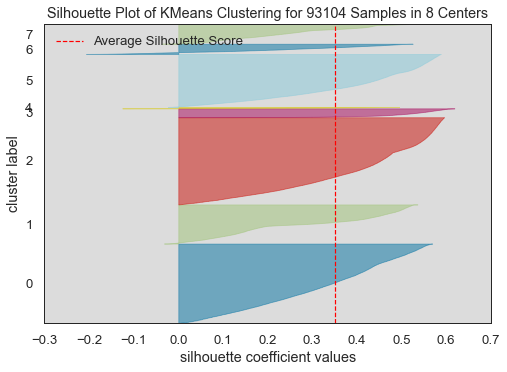

In [58]:
# Visualisation du coefficient de silhouette avec 8 clusters

model_rfm2 = KMeans(n_clusters=8)
visualizer = SilhouetteVisualizer(model_rfm2, colors='yellowbrick')
visualizer.fit(df_means2)
visualizer.show()
plt.show()

Notre analyse des différents coefficients de silhouette nous indique une meilleure répartition vers 6 clusters. Nous allons donc conserver ce nombre pour la suite de nos projections.

En effet, ce dernier présente le meilleur score mais également une répartition plus homogènes.

In [59]:
# Modélisation de notre modèle avec le nombre de clusters optimisé.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)
y_kmeans2 = kmeans.fit_predict(df_means2)

##### 1.3 TSNE après modélisation

In [60]:
# Préparation des données pour la TSNE

inertia = {}
dict_kmeans = {}

nb_boucles=2
max_clusters = 8

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i).fit(df_means2)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans[k,i] = kmeans

Boucle  1
Boucle  2


<AxesSubplot:title={'center':'Représentation T-SNE de la séparation du jeu de données via KMeans (6 clusters)'}>

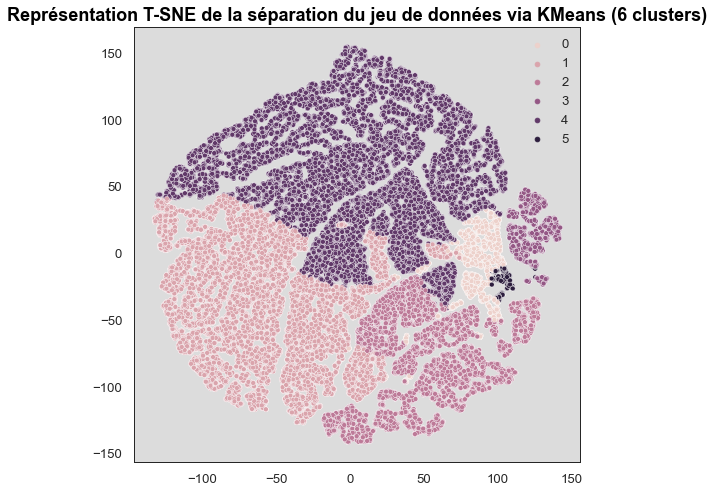

In [61]:
# Visualisation des données

plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation du jeu de données via KMeans (6 clusters)',
         fontdict = title)
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=dict_kmeans[(1,6)].labels_,
                legend='full')

Dans l'analyse de la répartition de nos clusters, l'ajout de cette nouvelle variable tend à obtenir un meilleur résultat.


##### 1.4 Analyse des clusters

In [62]:
# Intégration des clusters dans notre jeu de données.

df_means2 = data[['recency','order_id','Total_paiements','review_score']]

clusters2 = model_rfm2.labels_
df_means2['label_centroide'] = y_kmeans2
df_means2

,recency,order_id,Total_paiements,review_score,label_centroide
0,112,1,141.90,5.0,2
1,115,1,27.19,4.0,2
2,538,1,86.22,3.0,4
3,322,1,43.62,4.0,4
4,289,1,196.89,5.0,4
...,...,...,...,...,...
93099,448,1,2067.42,5.0,5
93100,263,1,84.58,4.0,4
93101,569,1,112.46,5.0,4
93102,120,1,133.69,5.0,2


2    40237
4    30858
1    15305
0     3463
3     2760
5      481
Name: label_centroide, dtype: int64


Text(0.5, 1.0, 'Visualisation des clients par clusters')

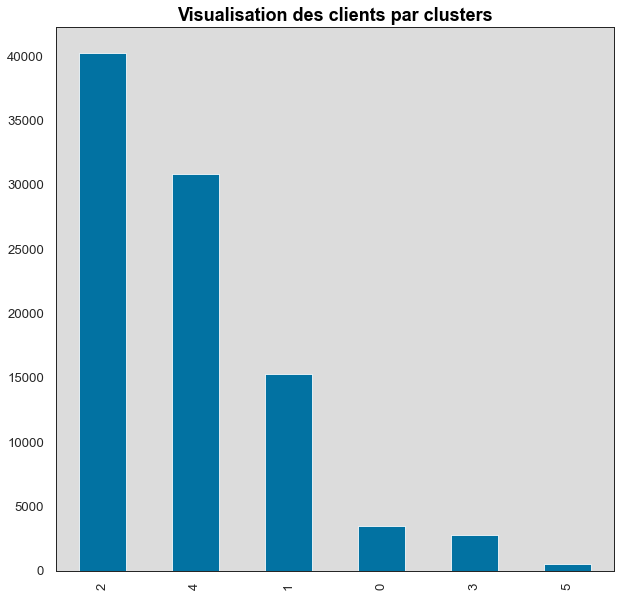

In [63]:
# Visualisation des clients par clusters

print(df_means2['label_centroide'].value_counts())

plt.figure(figsize = (10,10))
df_means2['label_centroide'].value_counts().plot(kind = 'bar')
plt.title('Visualisation des clients par clusters',
         fontdict = title)

In [64]:
df_means2 = data[['recency','order_id','Total_paiements','review_score']]

clusters2 = model_rfm2.labels_
df_means2['label_centroide'] = y_kmeans2
df_means2

,recency,order_id,Total_paiements,review_score,label_centroide
0,112,1,141.90,5.0,2
1,115,1,27.19,4.0,2
2,538,1,86.22,3.0,4
3,322,1,43.62,4.0,4
4,289,1,196.89,5.0,4
...,...,...,...,...,...
93099,448,1,2067.42,5.0,5
93100,263,1,84.58,4.0,4
93101,569,1,112.46,5.0,4
93102,120,1,133.69,5.0,2


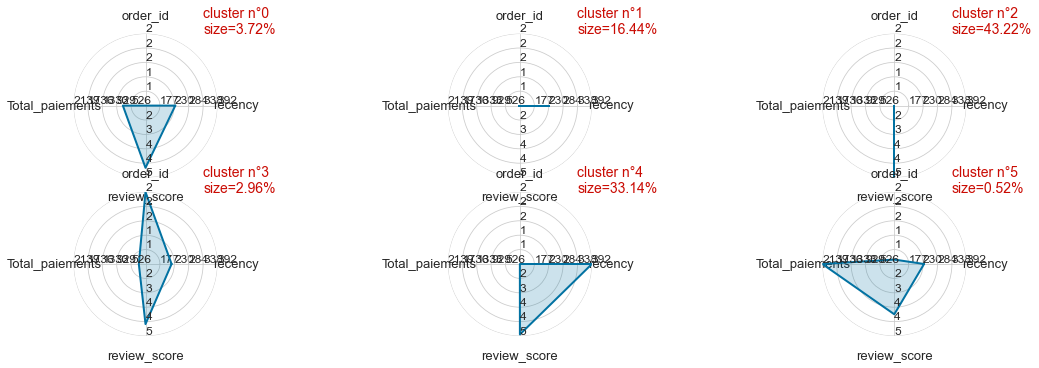

In [65]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    res = [(d-y1) / (y2-y1) * (x2-x1) + x1
           for d, (y1, y2) in zip(data, ranges)]
    return res


class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges,
                 n_ordinate_levels=6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:]
        size_x, size_y = sizes[:]

        axes = [fig.add_axes([ix, iy, size_x, size_y],
                             polar=True,
                             frameon=False,
                             label="axes{}".format(i))
                for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels=variables, size=13)

        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)

        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid(False)

        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num=n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:]]
            ax.set_rgrids(grid, labels=grid_label, angle=angles[i], size=12)
            ax.set_ylim(*ranges[i])

        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)

    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform=self.ax.transAxes, *args, **kw)

def radar_plot(df, group="label_centroide", xsize=0.1, ysize=0.05, figsize=(12, 4)):
    """
    Input : Dataframe, colonne des clusters
    Output : Affichage des clusters en radar chart
    """

    # Moyenne des variables par cluster
    df_agg = df.groupby(group)[df.columns].mean()

    # Taille des clusters en %
    clusters_size = round(df[group].value_counts()
                          / df[group].count() * 100, 2)

    # Liste des variables descriptives des clusters
    var_descriptives = [col for col in df.columns if col not in group]

    # Min,max des variables descriptives
    var_descript_ranges = [list(df_agg.describe().loc[['min', 'max'], var])
                           for var in var_descriptives]

    # Nombre de clusters
    n_clusters = df[group].nunique()

    # Liste des index des variables descriptives
    vars_index = list(range(len(var_descriptives)))

    # Dimension de la grille
    n_cols = 3
    m_rows = n_clusters // n_cols

    size_x, size_y = (1 / n_cols), (1 / m_rows)

    fig = plt.figure(figsize=figsize)

    df_agg_index = df_agg.index

    for i_cluster in range(n_clusters):

        ix = i_cluster % n_cols
        iy = m_rows - i_cluster // n_cols
        pos_x = ix * (size_x + xsize)
        pos_y = iy * (size_y + ysize)
        location = [pos_x, pos_y]
        sizes = [size_x, size_y]
        data_plot = np.array(df_agg.loc[df_agg_index[i_cluster],
                                        var_descriptives])
        radar = RadarChart(fig, location, sizes, var_descriptives,
                           var_descript_ranges)
        radar.plot(data_plot, color='b', linewidth=2.0)
        radar.fill(data_plot, alpha=0.2, color='b')

        # Titre du radarchart
        cluster_num = df_agg_index[i_cluster]
        cluster_size = clusters_size[i_cluster]
        radar.title(title=f'cluster n°{cluster_num}\nsize={cluster_size}%',
                    color='r',
                    size=14)
        i_cluster += 1
        
# Données pour le radar chart
rfm_quantiles = df_means2.loc[:, ['recency','order_id','Total_paiements','review_score', 'label_centroide']]
# Affichage des radar chart
radar_plot(df=rfm_quantiles)


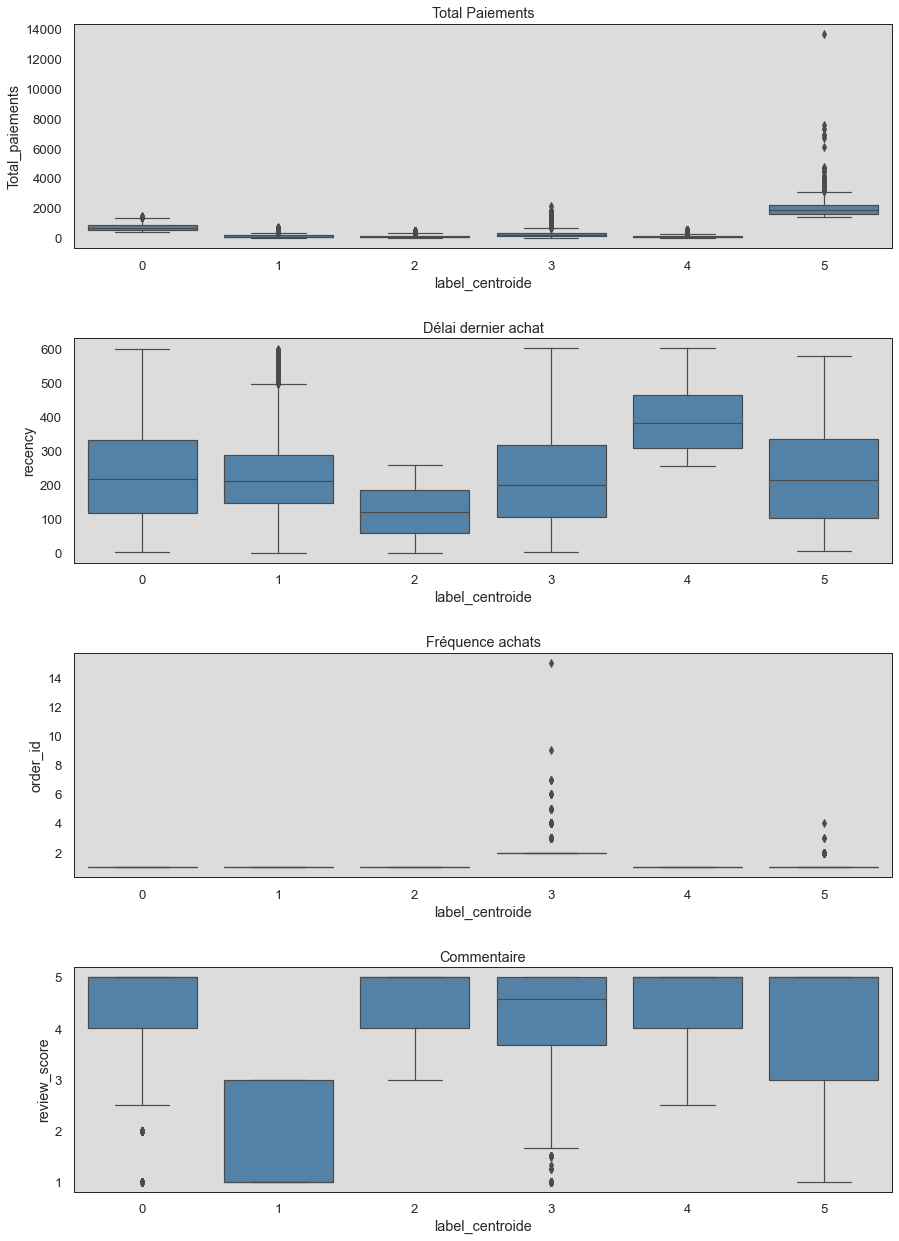

In [66]:
# Boîte à moustache des types de client


fig, axs = plt.subplots(4, 1)
fig.subplots_adjust(left=0.08, right=1.5, bottom=0.05,
                    top=3, hspace=0.4, wspace=0.3)

# Boxplot Récence
sns.boxplot(x='label_centroide', y='Total_paiements', data=df_means2,
            color='SteelBlue', ax=axs[0])
axs[0].set_title('Total Paiements')

# Boxplot Fréquence
sns.boxplot(x='label_centroide', y='recency', data=df_means2,
            color='SteelBlue', ax=axs[1])
axs[1].set_title('Délai dernier achat')

# Boxplot Montant
sns.boxplot(x='label_centroide', y='order_id', data=df_means2,
            color='SteelBlue', ax=axs[2])
axs[2].set_title('Fréquence achats')

# Boxplot Commentaire
sns.boxplot(x='label_centroide', y='review_score', data=df_means2,
            color='SteelBlue', ax=axs[3])
axs[3].set_title('Commentaire')

plt.show()

##### 1.5 Modélisation avec ACP

In [67]:
scaler = StandardScaler()

X2 = df_means2[['recency','order_id','Total_paiements','review_score']]

X2_scaled = scaler.fit_transform(X2)

pca = PCA(X2)

In [68]:
# On démarre par la création de notre variable names et features

names = data.index
features = data.columns

In [69]:
# Vérification de nos données
idx = ["mean", "std"]

pd.DataFrame(X2_scaled).describe().round(2).loc[idx, :]

,0,1,2,3
mean,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0


In [70]:
# Création nombre de composants (choix aléatoire)

n_components = 4

# On lance notre ACP

pca = PCA(n_components=n_components)

# On l'entraîne sur nos données
df_pca = pca.fit_transform(X2_scaled)

df_pca.shape

(93104, 4)

In [71]:
# Création de nos données dans un Dataframe
data_pca = pd.DataFrame(X2, columns=['CP_1', 'CP_2', 'CP_3', 'CP_4'])

In [72]:
# Utilisation de la variance captée
pca.explained_variance_ratio_

# On enregistre cette donnée dans une variable
varcum = (pca.explained_variance_ratio_*100).round(2)
pca_variance = pca_variance = pca.explained_variance_ratio_

# Somme cumulée
somcum = varcum.cumsum().round()


print('La variable cumulée est de :',varcum)
print('La somme cumulée est de :',somcum)

La variable cumulée est de : [28.56 25.37 24.73 21.34]
La somme cumulée est de : [ 29.  54.  79. 100.]


In [73]:
# Création de nos données dans un Dataframe
data_pc = pd.DataFrame(df_pca, columns=['CP_1', 'CP_2', 'CP_3', 'CP_4'])
data_graph = data_pc.join(X2, how = 'left')

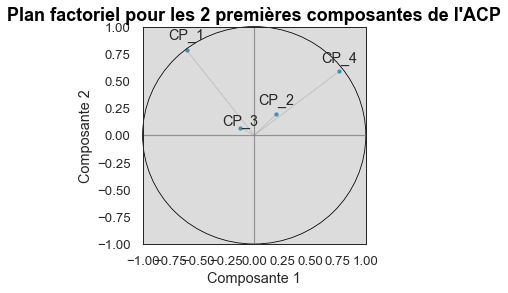

In [74]:
data_pca = data_pca.select_dtypes(['float64','int32'])
colonnes_pca = data_pca.columns


from matplotlib.patches import Circle

sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(4,4))
plt.title("Plan factoriel pour les 2 premières composantes de l'ACP",
         fontdict = title)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[1,:]
y_pca = pca.components_[2,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1)

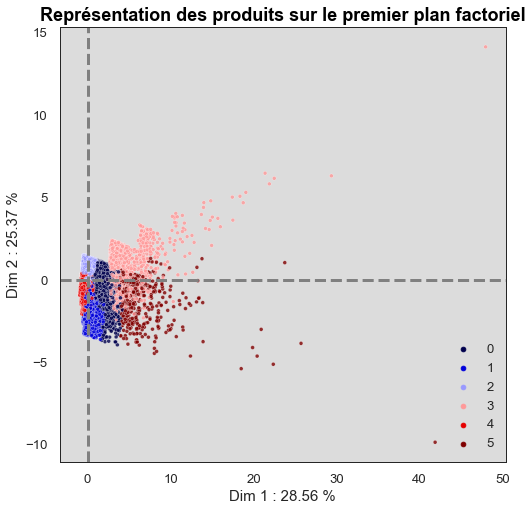

In [75]:

# visualisation des observations sur l'axe principal de l'ACP, avec couleurs selon les scores

fig = plt.figure(figsize=(8,8))
sns.set_context("paper", font_scale=1.5)

g= sns.scatterplot(data=data_pc, x='CP_1', y='CP_2', hue= y_kmeans2, alpha=0.8,
                  s=15, legend='full',
                  palette = 'seismic')

plt.title("Représentation des produits sur le premier plan factoriel", fontdict = title)
g.set_xlabel("Dim 1 : " + str(round(pca_variance[0]*100,2)) + " %", fontsize=15)
g.set_ylabel("Dim 2 : " + str(round(pca_variance[1]*100,2)) + " %", fontsize=15)

plt.axvline(color='gray', linestyle='--', linewidth=3)
plt.axhline(color='gray', linestyle='--', linewidth=3)


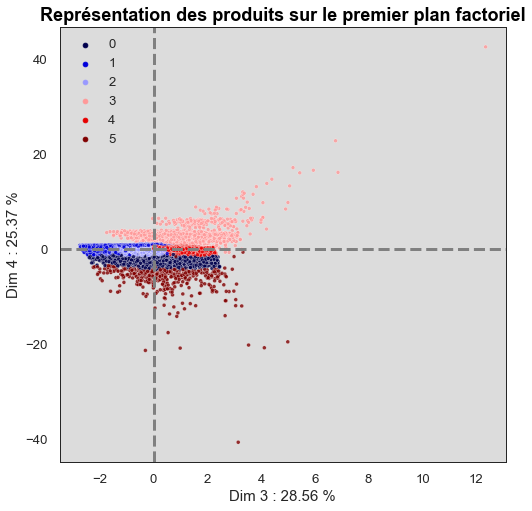

In [76]:
fig = plt.figure(figsize=(8,8))
sns.set_context("paper", font_scale=1.5)

g= sns.scatterplot(data=data_pc, x='CP_3', y='CP_4', hue= y_kmeans2, alpha=0.8,
                  s=15, legend='full',
                  palette = 'seismic')

plt.title("Représentation des produits sur le premier plan factoriel", fontdict = title)
g.set_xlabel("Dim 3 : " + str(round(pca_variance[0]*100,2)) + " %", fontsize=15)
g.set_ylabel("Dim 4 : " + str(round(pca_variance[1]*100,2)) + " %", fontsize=15)

plt.axvline(color='gray', linestyle='--', linewidth=3)
plt.axhline(color='gray', linestyle='--', linewidth=3)


Ce modèle présente de meilleurs résultats dans les différents clusters. Nous allons opter pour cette méthode.
Toutefois, nous allons procéder à une optimisation des paramètres

## IV. Optimisation de notre modèle

In [77]:
# Sélection de plusieurs paramètres


grid_param = {'max_iter': [50, 100, 150, 200 ,250, 300],
             'init': ['k-means++', 'random'],
             'algorithm': ['lloyd', 'elkan', 'auto', 'full']}
              
grid_search = GridSearchCV(KMeans(), grid_param, cv = 5)

In [78]:
%%time

# ici, on entraine la fonction
grid_search.fit(df_means2)


Wall time: 7min 46s


GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [50, 100, 150, 200, 250, 300]})

In [79]:
# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search.best_params_)

Les meilleurs hyperparamètres sont :  {'algorithm': 'elkan', 'init': 'random', 'max_iter': 50}


Dans le cadre de notre maintenance, nous allons conserver notre modélisation avec 5 clusters mais avec une optimisation des autres paramètres.
Cette optimisation sera notamment nécessaire dans la maintenance de nos données.